In [1]:
import pandas as pd
df=pd.read_csv("D:\DeepLearning\diabetes.csv")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
array=df.values

In [4]:
array
# seperate out the values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import seaborn as sns

In [7]:
corr=df.corr()

In [8]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
y=df.Outcome

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
indep=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
x=df[indep]

In [12]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
288,4,96,56,17,49,20.8,0.340,26
10,4,110,92,0,0,37.6,0.191,30
688,1,140,74,26,180,24.1,0.828,23
748,3,187,70,22,200,36.4,0.408,36
327,10,179,70,0,0,35.1,0.200,37
...,...,...,...,...,...,...,...,...
152,9,156,86,28,155,34.3,1.189,42
130,4,173,70,14,168,29.7,0.361,33
323,13,152,90,33,29,26.8,0.731,43
506,0,180,90,26,90,36.5,0.314,35


In [15]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
243,6,119,50,22,176,27.1,1.318,33
270,10,101,86,37,0,45.6,1.136,38
205,5,111,72,28,0,23.9,0.407,27
505,10,75,82,0,0,33.3,0.263,38
370,3,173,82,48,465,38.4,2.137,25
...,...,...,...,...,...,...,...,...
697,0,99,0,0,0,25.0,0.253,22
72,13,126,90,0,0,43.4,0.583,42
335,0,165,76,43,255,47.9,0.259,26
329,6,105,70,32,68,30.8,0.122,37


In [16]:
y_train

288    0
10     0
688    0
748    1
327    0
      ..
152    1
130    1
323    1
506    1
729    0
Name: Outcome, Length: 614, dtype: int64

In [17]:
clf_d=DecisionTreeClassifier()

In [18]:
Des=clf_d.fit(x_train,y_train)

In [19]:
Des

DecisionTreeClassifier()

In [20]:
y_pred=Des.predict(x_test)

In [21]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
y_test

243    1
270    1
205    0
505    0
370    1
      ..
697    0
72     1
335    0
329    0
558    0
Name: Outcome, Length: 154, dtype: int64

In [23]:
y_pred=Des.predict(x_test)

0.7467532467532467

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,y_pred)

array([[87, 20],
       [19, 28]], dtype=int64)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf=RandomForestClassifier()

In [28]:
rf1=rf.fit(x_train,y_train)

In [29]:
rf1

RandomForestClassifier()

In [30]:
rf1.score(x_train,y_train)

1.0

In [31]:
rf1.score(x_test,y_test)

0.7922077922077922

In [32]:
rf_y_pred=rf1.predict(x_test)

In [33]:
rf_y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 23.52222222222222, 'Predicted label')

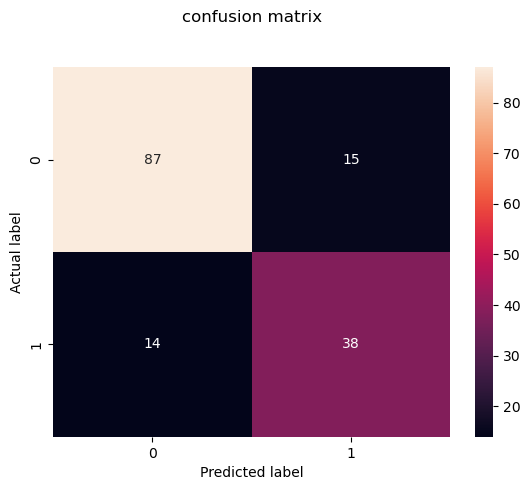

In [54]:
cnf_matrix=metrics.confusion_matrix(y_test,rf_y_pred)
p=sns.heatmap(data=cnf_matrix,annot=True,fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [2]:
sns.countplot(x='fraud_reported',data=df,hue='fraud_reported')

NameError: name 'sns' is not defined